Objective: Provide insights to the store owner to improve customer experience by analysing sales data. Thus increasing customer traffic and increase sales. 

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualization tool
%matplotlib inline
import seaborn as sns


In [96]:
df = pd.read_csv("Diwali_Sales_Data.csv", encoding= 'unicode_escape') 

In [97]:
df.shape #for number of rows and columns

(11251, 15)

In [98]:
df.head() #shows the first 5 rows of the dataframe

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [99]:
df.tail() #shows the last 5 as default if not value specified rows of the dataframe

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [100]:
df.info() #to get the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [101]:
df.drop(['Status','unnamed1'],axis= 1,inplace=True) #droping the columns inplace saves the value


In [102]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [103]:
df.isnull().sum() #to check null values

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [107]:
df.shape

(11239, 13)

In [114]:
df.dropna(inplace=True)

In [119]:
df.isnull().sum() # to see if the null values are deleted

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age_Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [124]:
df['Amount'] = df['Amount'].astype('int') #To get the value as whole number

In [125]:
df['Amount'].dtypes # To cinfirm if datetype has changed.

dtype('int32')

In [129]:
df.rename(columns={'Age Group' : 'Age_Group'},inplace=True)

In [136]:
df.describe() # returns the decription of the data 

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [138]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Exploratory Data analysis

Gender Data analysis

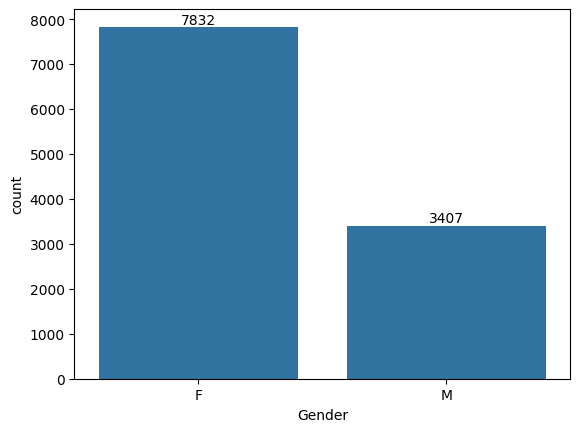

In [145]:
ax = sns.countplot(x = "Gender",data = df) #To get genterwise bar
for bars in ax.containers:
    ax.bar_label(bars) # To value of bars

In [ ]:
import seaborn as sns
sales_gender = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(sales_gender) #We got the amount of sales by gender

<Axes: xlabel='Gender', ylabel='Amount'>

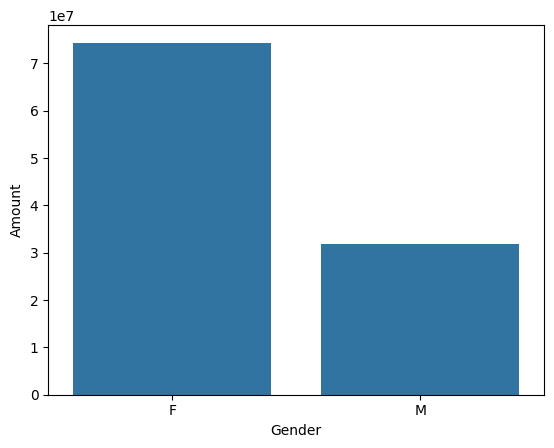

In [159]:
sns.barplot(x='Gender',y = "Amount" , data = sales_gender)#We can visualize the sales by gender

From the above graphs we learned most purchases are done by women and also purchasing power is more for women too.

AGE Data analysis

Relation between age group and gendere

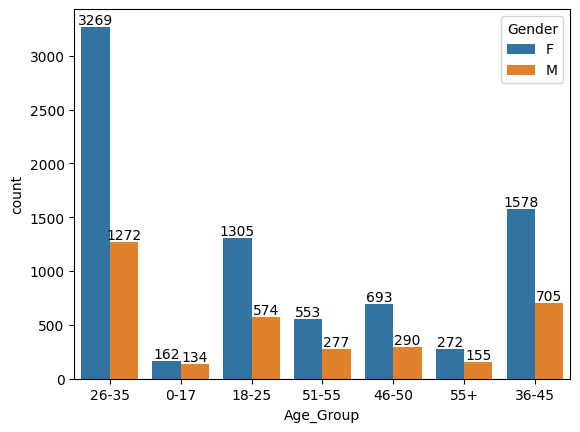

In [162]:
agex = sns.countplot(data = df,x = "Age_Group" , hue = "Gender") 
for bars in agex.containers:
    agex.bar_label(bars)

Total Amount VS Age group

<Axes: xlabel='Age_Group', ylabel='Amount'>

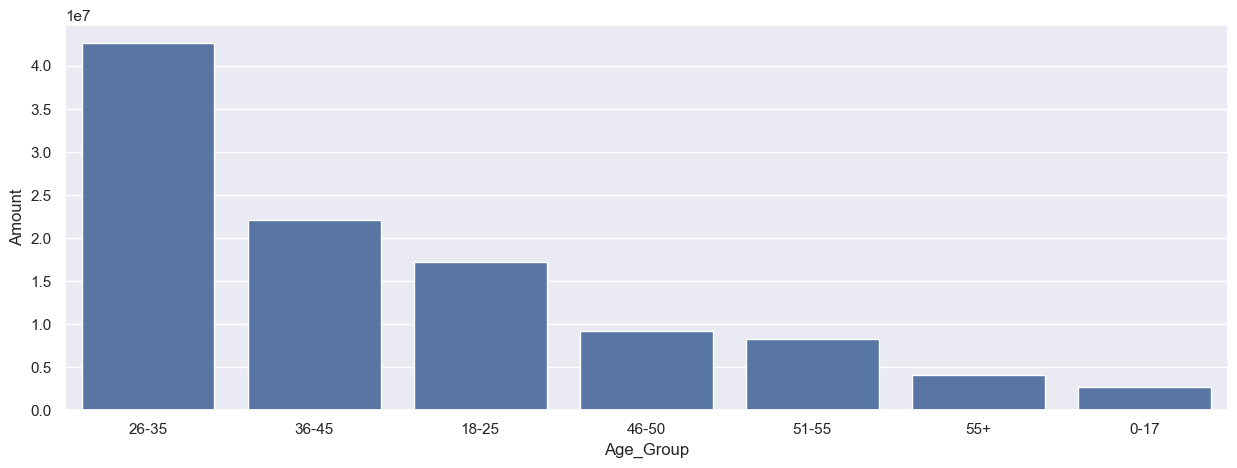

In [166]:
sales_age = df.groupby(["Age_Group"],as_index = False)["Amount"].sum().sort_values(by='Amount',ascending = False)
sns.barplot(x = "Age_Group",y = "Amount",data = sales_age)

From the above graph we can see that mmost of buyers are of the age group 26-35

State  Data analysis

Total orders from top 10 states

<Axes: xlabel='State', ylabel='Orders'>

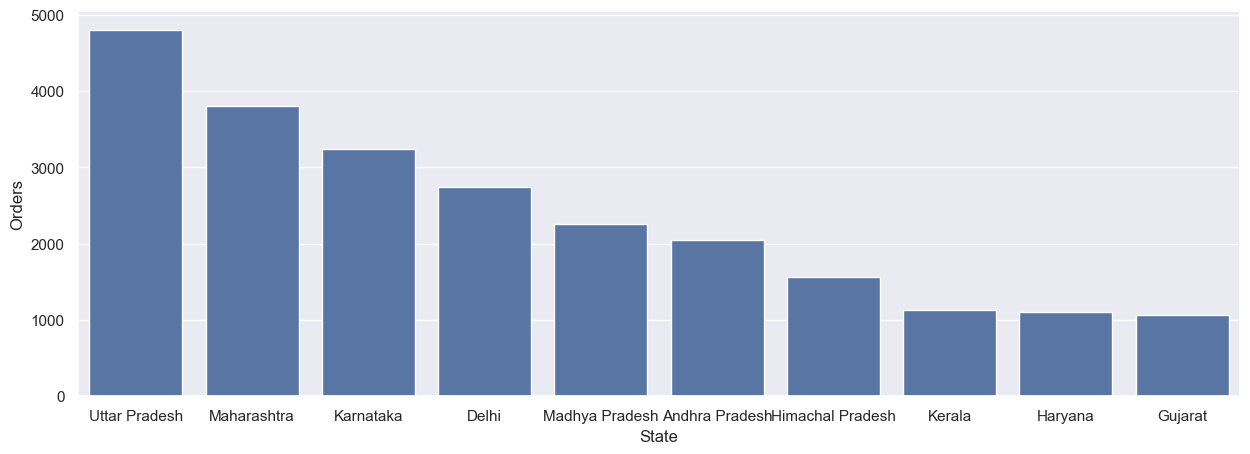

In [172]:
sales_state = df.groupby(["State"],as_index = False)["Orders"].sum().sort_values(by = "Orders",ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (15,5)})# We used group and sort function along with head function to get top 10 and used sns set function to arrange it neatly
sns.barplot(x = "State", y = "Orders", data = sales_state)

Total orders from top 10 states

<Axes: xlabel='State', ylabel='Amount'>

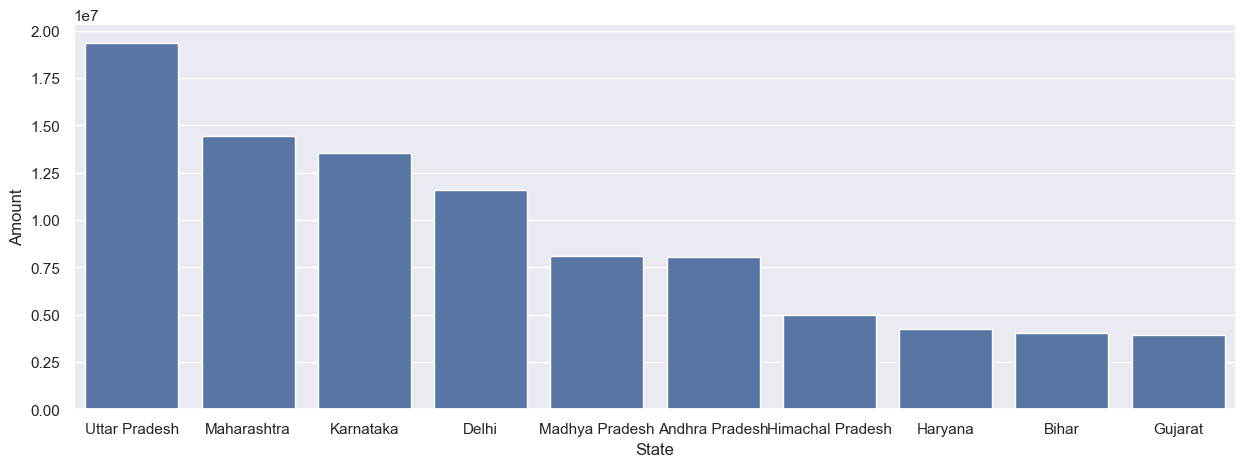

In [174]:
sales_state = df.groupby(["State"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (15,5)})# We used group and sort function along with head function to get top 10 and used sns set function to arrange it neatly
sns.barplot(x = "State", y = "Amount", data = sales_state)

From the above graphs we found that the top 3 states in total orders and total amount are Uttar Pradesh,Maharastra and Karnataka. 

Marital Status Data analysis

Number of married(1) VS unmaried(0)

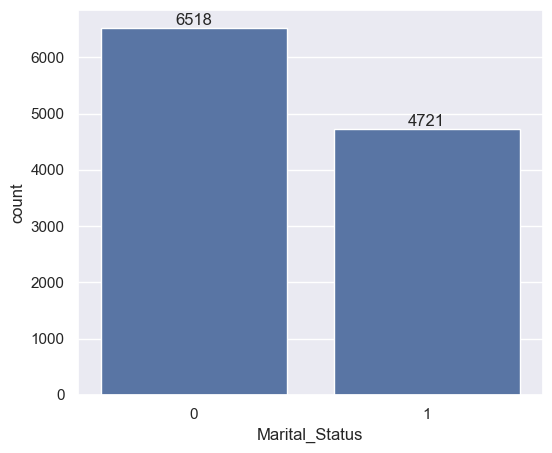

In [182]:
marry = sns.countplot(data = df , x = "Marital_Status")
sns.set(rc = {"figure.figsize":(7,5)})
for bars in marry.containers:
    marry.bar_label(bars)

Total amount VS marrital_status and gender

<Axes: xlabel='Marital_Status', ylabel='Amount'>

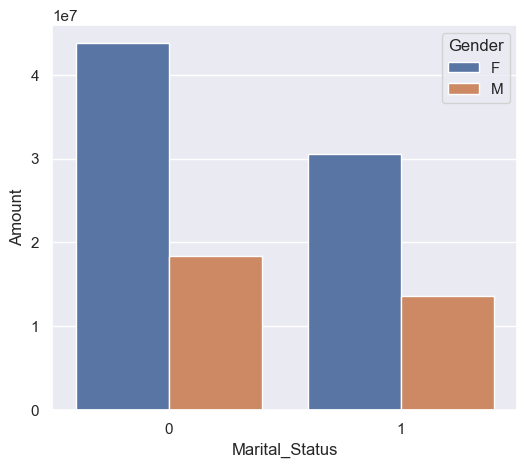

In [188]:
sales_marry = df.groupby(["Marital_Status","Gender"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)
sns.set(rc = {'figure.figsize' : (6,5)})# We used group and sort function along with head function to get top 10 and used sns set function to arrange it neatly
sns.barplot( data = sales_marry,x = "Marital_Status", y = "Amount",hue = "Gender")

From the above Graph we can see that married women are majority buyers.

Product Category Data Analysis

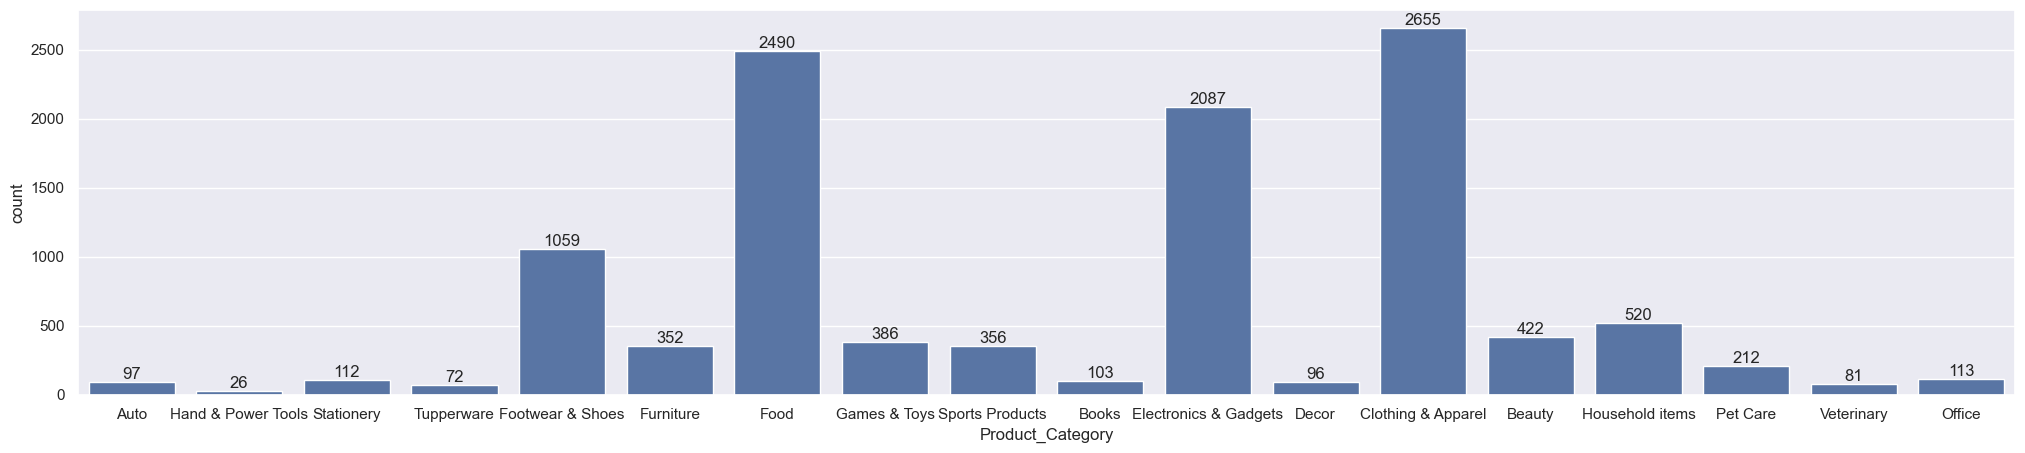

In [189]:
sns.set(rc={"figure.figsize": (25,5)})
sales_cat = sns.countplot(data = df,x = "Product_Category")
for bars in sales_cat.containers:
    sales_cat.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

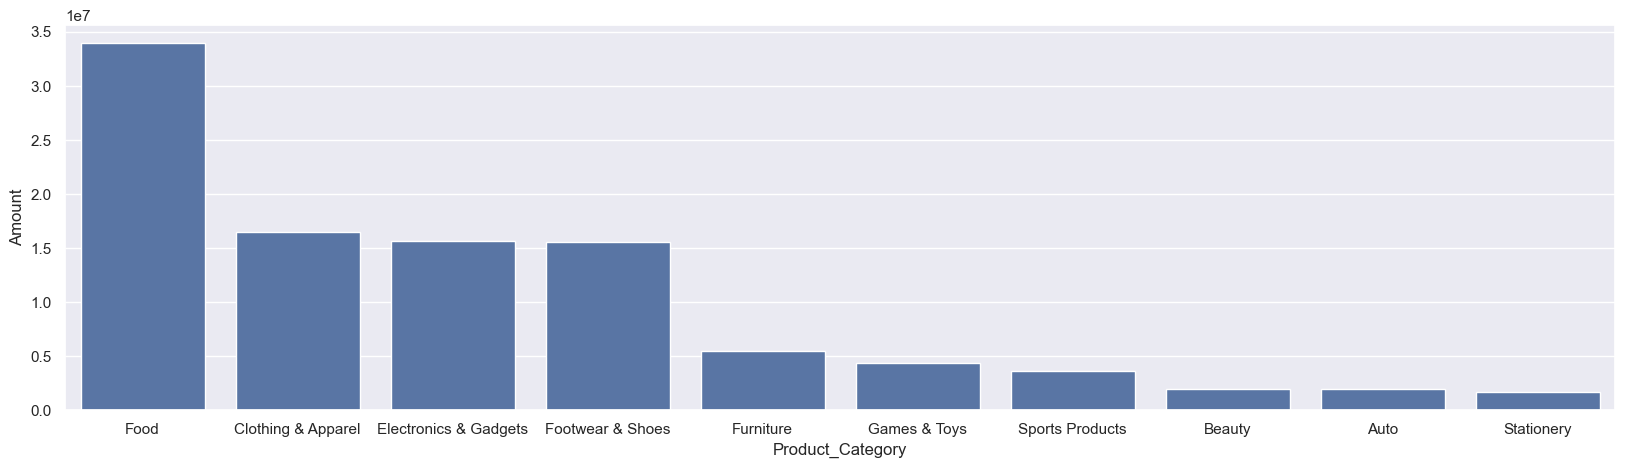

In [190]:
sales_state = df.groupby(["Product_Category"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (20,5)})# We used group and sort function along with head function to get top 10 and used sns set function to arrange it neatly
sns.barplot(x = "Product_Category", y = "Amount", data = sales_state)

From the above graphs we can conclude that majority of ordesales are from categories Food,Clothing and Electronics

Conclution: Married Women aged 26-35 from Uttar Pradesh,Maharashtra and Karnataka are more likly to buy products from Food,Clothing and Electronics categoriess and contribute most to sales